In [1]:
import requests
from datetime import datetime
import pandas as pd
import plotly.graph_objects as go

In [2]:
EXCHANGE = 'gemini'
PAIR = 'ethusd'
START_DATE = '12/8/2021'
END_DATE = '1/8/2022'
PERIOD = 86400  # 1 day in seconds

In [3]:
def to_timestamp(dateString):
    element = datetime.strptime(dateString, '%m/%d/%Y')
    return int(datetime.timestamp(element))

def to_date(timestamp):
    dt = datetime.fromtimestamp(timestamp)
    return dt.strftime('%m/%d/%Y')

start_ts = to_timestamp(START_DATE)
end_ts = to_timestamp(END_DATE)

In [21]:
import requests

# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&tickers=AAPL&apikey=demo'
r = requests.get(url)
data = r.json()


In [23]:
print(data)

{'Information': 'The **demo** API key is for demo purposes only. Please claim your free API key at (https://www.alphavantage.co/support/#api-key) to explore our full API offerings. It takes fewer than 20 seconds.'}


In [25]:
import requests
from pprint import pprint
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt

# Replace 'demo' with your actual Alpha Vantage API key
API_KEY = 'demo'

def get_news_sentiment(tickers='AAPL', topics='technology', limit=10):
    url = f'https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers={tickers}&topics={topics}&limit={limit}&apikey={API_KEY}'
    response = requests.get(url)
    return response.json()

def get_top_gainers_losers():
    url = f'https://www.alphavantage.co/query?function=TOP_GAINERS_LOSERS&apikey={API_KEY}'
    response = requests.get(url)
    return response.json()

def get_bitcoin_monthly_data():
    url = f'https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol=BTCUSD&apikey={API_KEY}'
    response = requests.get(url)
    data = response.json()
    
    # Check if there's an error message in the response
    if 'Error Message' in data:
        print(f"API Error: {data['Error Message']}")
        return None
    
    # Extract the monthly time series data
    time_series = data.get('Monthly Time Series', {})
    
    if not time_series:
        print("No time series data found in the API response.")
        print("API Response:", data)
        return None
    
    # Convert to DataFrame
    df = pd.DataFrame.from_dict(time_series, orient='index')
    
    if df.empty:
        print("DataFrame is empty after conversion.")
        return None
    
    df.index = pd.to_datetime(df.index)
    df = df.sort_index()
    
    # Convert columns to numeric
    for col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # Rename columns
    df.columns = ['open', 'high', 'low', 'close', 'volume']
    
    # Get last 10 years of data
    ten_years_ago = datetime.now() - timedelta(days=365*10)
    df = df[df.index >= ten_years_ago]
    
    return df

def plot_bitcoin_price(df):
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['close'])
    plt.title('Bitcoin Monthly Closing Price (Last 10 Years)')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.grid(True)
    plt.show()
    
def get_market_insights():
    # ... (previous code remains the same)

    # Get and display Bitcoin data
    bitcoin_data = get_bitcoin_monthly_data()
    if bitcoin_data is not None and not bitcoin_data.empty:
        print("\nBitcoin Monthly Data (Last 10 Years):")
        print(bitcoin_data.tail())
        
        # Plot Bitcoin price
        plot_bitcoin_price(bitcoin_data)
    else:
        print("Unable to retrieve or process Bitcoin data.")


# Run the combined analysis
get_market_insights()

No time series data found in the API response.
API Response: {'Information': 'The **demo** API key is for demo purposes only. Please claim your free API key at (https://www.alphavantage.co/support/#api-key) to explore our full API offerings. It takes fewer than 20 seconds.'}
Unable to retrieve or process Bitcoin data.


In [57]:
import requests
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

API_KEY = '2NUFLIW6M0EEXCDP'  # Replace with your actual API key

def get_bitcoin_monthly_data():
    url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=BTCUSD&apikey={API_KEY}'
    response = requests.get(url)
    data = response.json()
    
    if 'Error Message' in data:
        print(f"API Error: {data['Error Message']}")
        return None
    
    time_series = data.get('Monthly Time Series', {})
    
    if not time_series:
        print("No time series data found in the API response.")
        print("API Response:", data)
        return None
    
    df = pd.DataFrame.from_dict(time_series, orient='index')
    df.index = pd.to_datetime(df.index)
    df = df.sort_index()
    
    for col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    
    df.columns = ['open', 'high', 'low', 'close', 'volume']
    
    ten_years_ago = datetime.now() - timedelta(days=365*10)
    df = df[df.index >= ten_years_ago]
    
    return df

def plot_bitcoin_price(df):
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['close'])
    plt.title('Bitcoin Monthly Closing Price (Last 10 Years)')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.grid(True)
    plt.show()

# Test the function
bitcoin_data = get_bitcoin_monthly_data()
if bitcoin_data is not None and not bitcoin_data.empty:
    print("Bitcoin Monthly Data (Last 10 Years):")
    print(bitcoin_data.tail())
    plot_bitcoin_price(bitcoin_data)
else:
    print("Unable to retrieve or process Bitcoin data.")

No time series data found in the API response.
API Response: {'Information': 'Thank you for using Alpha Vantage! Our standard API rate limit is 25 requests per day. Please subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly remove all daily rate limits.'}
Unable to retrieve or process Bitcoin data.


Bitcoin Daily Data:
                  open        high         low       close  volume
2024-08-16  57547.2765  59865.0578  57100.1509  58891.0516   16280
2024-08-17  58891.4061  59711.0060  58814.3936  59497.6669    4049
2024-08-18  59501.6920  60281.4216  58429.8529  58445.6424    6661
2024-08-19  58440.0367  59639.9659  57841.5169  59454.3523   11763
2024-08-20  59470.5824  61448.6759  59385.7941  60506.5666    8081


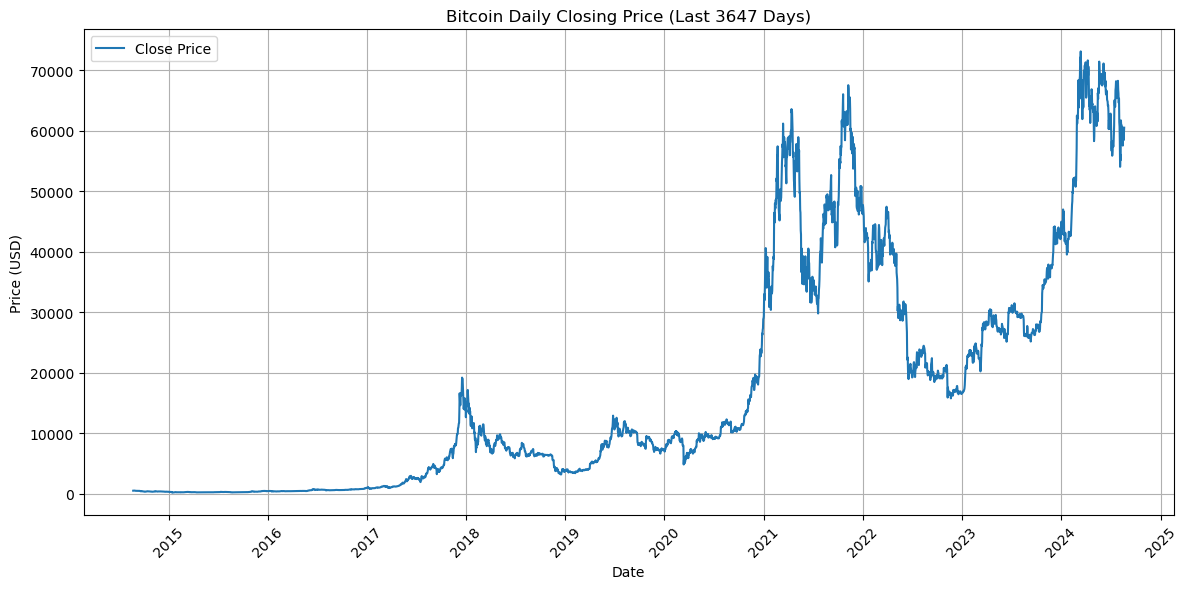

In [74]:
import requests
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import os

# Load API key from environment variable for security
API_KEY = os.getenv('ALPHA_VANTAGE_API_KEY', 'GQEXUGTK30H6656U')

def get_bitcoin_daily_data():
    url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=BTCUSD&outputsize=full&apikey={API_KEY}'
    response = requests.get(url)
    data = response.json()

    if 'Error Message' in data:
        print(f"API Error: {data['Error Message']}")
        return None
    
    time_series = data.get('Time Series (Daily)', {})
    
    if not time_series:
        print("No time series data found in the API response.")
        return None

    # Create DataFrame from the time series data
    df = pd.DataFrame.from_dict(time_series, orient='index')
    df.index = pd.to_datetime(df.index)
    df = df.sort_index()
    
    # Convert all columns to numeric
    for col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    
    df.columns = ['open', 'high', 'low', 'close', 'volume']

    # Get data for the last 5 years (adjust as needed)
    five_years_ago = datetime.now() - timedelta(days=10*365)
    df = df[df.index >= five_years_ago]
    
    return df

def plot_bitcoin_price(df):
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['close'], label='Close Price')
    plt.title(f'Bitcoin Daily Closing Price (Last {len(df)} Days)')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Test the function
bitcoin_data = get_bitcoin_daily_data()
if bitcoin_data is not None and not bitcoin_data.empty:
    print("Bitcoin Daily Data:")
    print(bitcoin_data.tail())
    plot_bitcoin_price(bitcoin_data)
else:
    print("Unable to retrieve or process Bitcoin data.")


In [77]:
pip install yfinance

python(53742) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 14.5 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 9.7 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.6-cp311-cp311-macosx_11_0_arm64.whl size=246653 sha256=f342da51a1cbc80fbe5bb6d1fb8547595e727cb715858578685d4a230a89eb6d
  Stored in directory: /Users/mobin.azimipanah/Library/Caches/pip/wheels/1c/09/7e/9f659fde248ecdc1722a142c1d744271aad3914a0afc191058
Successfully built peewee

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: /opt/anaconda3/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Hourly Bitcoin Data:
                                   Open          High           Low  \
Datetime                                                              
2024-08-21 19:00:00+00:00  60802.562500  61563.753906  60793.769531   
2024-08-21 20:00:00+00:00  61593.582031  61772.679688  60943.695312   
2024-08-21 21:00:00+00:00  61208.960938  61449.078125  60997.296875   
2024-08-21 22:00:00+00:00  61240.109375  61504.910156  61235.464844   
2024-08-21 23:00:00+00:00  61202.890625  61254.574219  61104.593750   

                                  Close      Volume  Dividends  Stock Splits  
Datetime                                                                      
2024-08-21 19:00:00+00:00  61563.753906  2360182784        0.0           0.0  
2024-08-21 20:00:00+00:00  61107.355469  1932400640        0.0           0.0  
2024-08-21 21:00:00+00:00  61197.097656   316311552        0.0           0.0  
2024-08-21 22:00:00+00:00  61238.648438   225961984        0.0           0.0  
2024-08

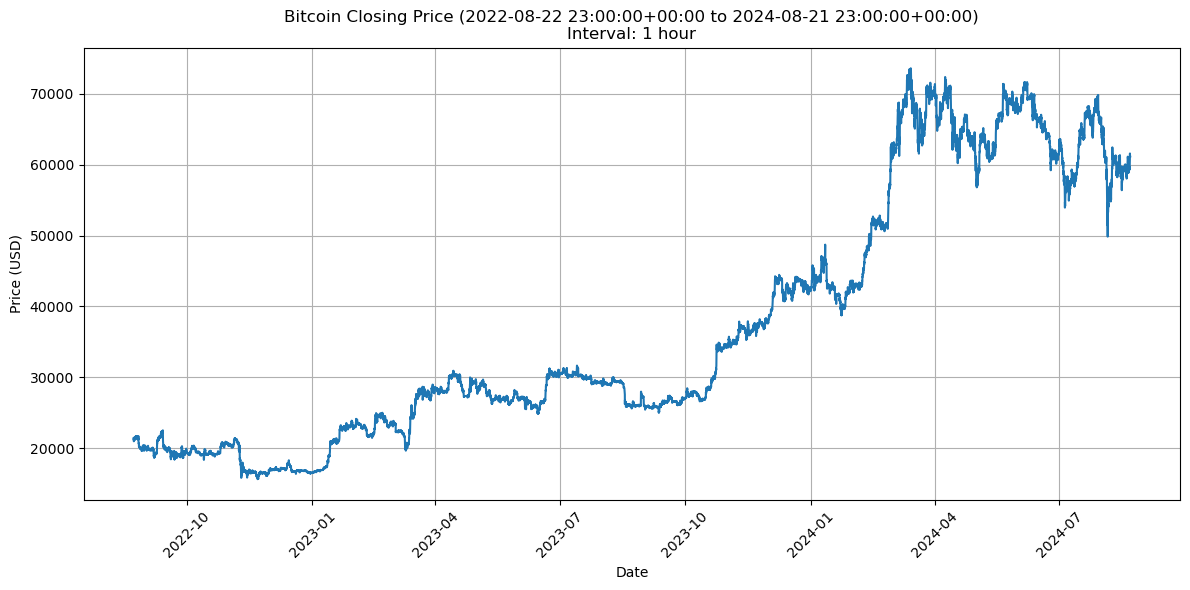

BTC-USD: Period '7d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']


No data found for BTC-USD

Custom Date Range Bitcoin Data (Hourly):
                                   Open          High           Low  \
Datetime                                                              
2023-01-06 19:00:00+00:00  16848.136719  16945.052734  16844.710938   
2023-01-06 20:00:00+00:00  16937.261719  16991.994141  16911.652344   
2023-01-06 21:00:00+00:00  16909.298828  16937.753906  16903.375000   
2023-01-06 22:00:00+00:00  16924.664062  16958.109375  16924.664062   
2023-01-06 23:00:00+00:00  16957.191406  16971.310547  16950.267578   

                                  Close     Volume  Dividends  Stock Splits  
Datetime                                                                     
2023-01-06 19:00:00+00:00  16936.654297          0        0.0           0.0  
2023-01-06 20:00:00+00:00  16911.652344  613467136        0.0           0.0  
2023-01-06 21:00:00+00:00  16924.189453  231863296        0.0           0.0  
2023-01-06 22:00:00+00:00  16958.042969  134

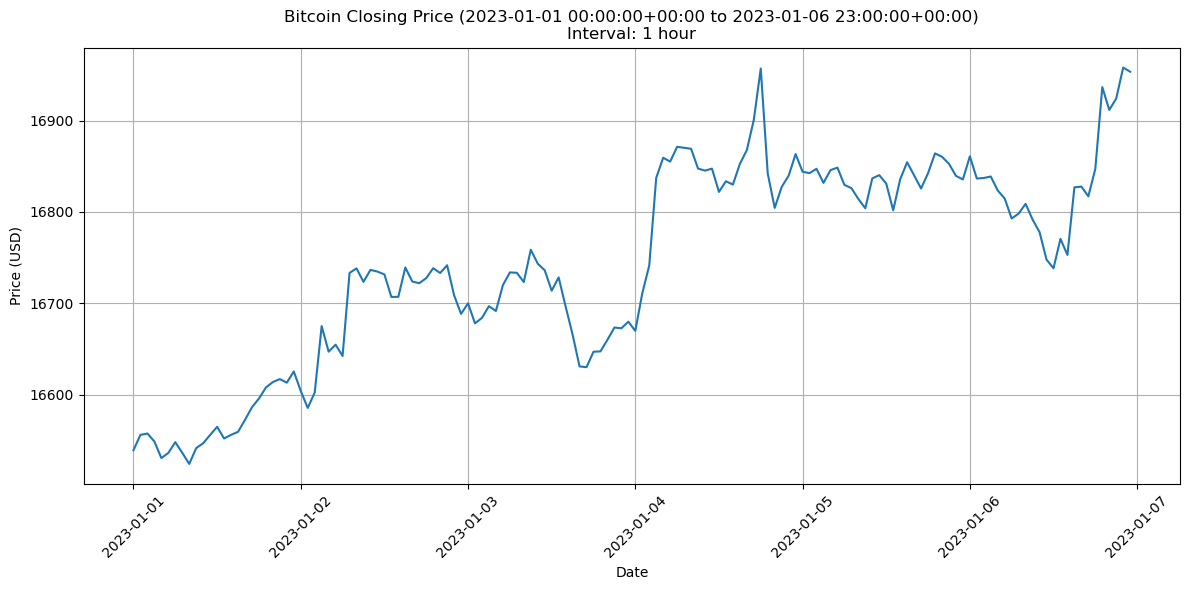

In [84]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

def get_bitcoin_data(symbol='BTC-USD', interval='1h', period=None, start=None, end=None):
    """
    Fetch Bitcoin data using yfinance.
    
    :param symbol: The ticker symbol for Bitcoin (default: 'BTC-USD')
    :param interval: Data interval ('1m' for minute, '1h' for hourly, '1d' for daily)
    :param period: The time period to fetch data for (e.g., '1d', '5d', '1mo', '3mo', '1y')
    :param start: Start date for custom date range (format: 'YYYY-MM-DD')
    :param end: End date for custom date range (format: 'YYYY-MM-DD')
    :return: DataFrame with price data
    """
    btc = yf.Ticker(symbol)
    
    if period:
        df = btc.history(interval=interval, period=period)
    elif start and end:
        df = btc.history(interval=interval, start=start, end=end)
    else:
        print("Please provide either 'period' or both 'start' and 'end' dates.")
        return None
    
    if df.empty:
        print(f"No data found for {symbol}")
        return None
    
    return df

def plot_bitcoin_price(df, interval):
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Close'])
    plt.title(f'Bitcoin Closing Price ({df.index[0]} to {df.index[-1]})\nInterval: {interval}')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Example usage:

# 1. Hourly data for the last 7 days
hourly_data = get_bitcoin_data(interval='1h', period='max')
if hourly_data is not None:
    print("Hourly Bitcoin Data:")
    print(hourly_data.tail())
    plot_bitcoin_price(hourly_data, '1 hour')

# 2. Minute data for the last 24 hours
minute_data = get_bitcoin_data(interval='1m', period='7d')
if minute_data is not None:
    print("\nMinute Bitcoin Data:")
    print(minute_data.tail())
    plot_bitcoin_price(minute_data, '1 minute')

# 3. Custom date range with hourly data
custom_data = get_bitcoin_data(interval='1h', start='2023-01-01', end='2023-01-07')
if custom_data is not None:
    print("\nCustom Date Range Bitcoin Data (Hourly):")
    print(custom_data.tail())
    plot_bitcoin_price(custom_data, '1 hour')

# Note: Second-level data is not directly available through yfinance

Bitcoin Hourly Data:
                         high       low      open  volumefrom      volumeto  \
time                                                                          
2024-08-21 19:00:00  61660.39  60748.45  60799.14     5632.26  3.444427e+08   
2024-08-21 20:00:00  61851.26  60933.35  61601.80     3401.86  2.089960e+08   
2024-08-21 21:00:00  61496.33  60959.02  61251.06     1545.45  9.462159e+07   
2024-08-21 22:00:00  61525.52  61197.22  61250.71     1216.57  7.463799e+07   
2024-08-21 23:00:00  61298.40  61023.04  61198.90     1217.25  7.442711e+07   

                        close conversionType conversionSymbol  
time                                                           
2024-08-21 19:00:00  61601.80         direct                   
2024-08-21 20:00:00  61251.06         direct                   
2024-08-21 21:00:00  61250.71         direct                   
2024-08-21 22:00:00  61198.90         direct                   
2024-08-21 23:00:00  61172.23         dir

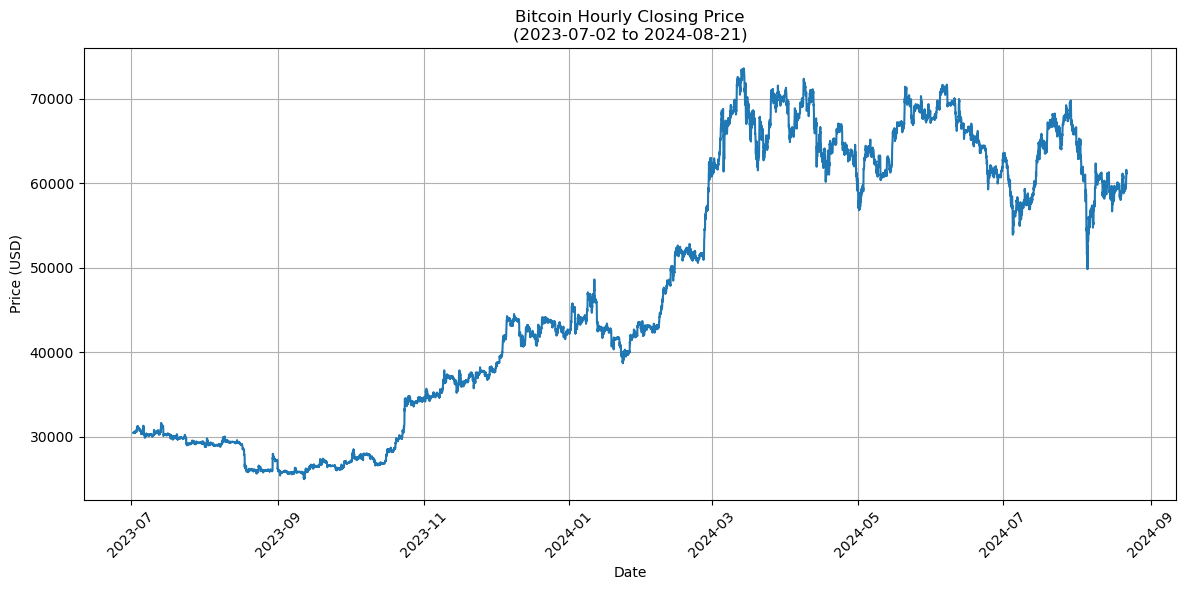

10005


In [87]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

def get_bitcoin_hourly_data(days=365):  # 3650 days = 10 years
    """
    Fetch hourly Bitcoin data for the specified number of days.
    
    :param days: Number of days of historical data to fetch (default: 3650)
    :return: DataFrame with hourly price data
    """
    end_time = int(datetime.now().timestamp())
    start_time = end_time - (days * 24 * 60 * 60)
    
    url = "https://min-api.cryptocompare.com/data/v2/histohour"
    
    all_data = []
    current_time = end_time
    
    while current_time > start_time:
        params = {
            "fsym": "BTC",
            "tsym": "USD",
            "limit": 2000,  # Max limit per request
            "toTs": current_time
        }
        
        response = requests.get(url, params=params)
        data = response.json()
        
        if data['Response'] == "Error":
            print(f"API Error: {data['Message']}")
            return None
        
        hourly_data = data['Data']['Data']
        all_data = hourly_data + all_data
        
        if len(hourly_data) < 2000:
            break
        
        current_time = hourly_data[0]['time'] - 3600  # Move to the previous hour
    
    df = pd.DataFrame(all_data)
    df['time'] = pd.to_datetime(df['time'], unit='s')
    df.set_index('time', inplace=True)
    df.sort_index(inplace=True)
    
    return df

def plot_bitcoin_price(df):
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['close'])
    plt.title(f'Bitcoin Hourly Closing Price\n({df.index[0].date()} to {df.index[-1].date()})')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Fetch the data
bitcoin_data = get_bitcoin_hourly_data()

if bitcoin_data is not None and not bitcoin_data.empty:
    print("Bitcoin Hourly Data:")
    print(bitcoin_data.tail())
    plot_bitcoin_price(bitcoin_data)
    print(len(bitcoin_data))
else:
    print("Unable to retrieve or process Bitcoin data.")

# Optional: Save to CSV
# bitcoin_data.to_csv('bitcoin_hourly_10years.csv')

In [89]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import time

def get_bitcoin_minute_data(days=3650):  # 3650 days = 10 years
    """
    Fetch minute Bitcoin data for the specified number of days.
    
    :param days: Number of days of historical data to fetch (default: 3650)
    :return: DataFrame with minute price data
    """
    end_time = int(datetime.now().timestamp())
    start_time = end_time - (days * 24 * 60 * 60)
    
    url = "https://min-api.cryptocompare.com/data/v2/histominute"
    
    all_data = []
    current_time = end_time
    
    while current_time > start_time:
        params = {
            "fsym": "BTC",
            "tsym": "USD",
            "limit": 2000,  # Max limit per request
            "toTs": current_time
        }
        
        response = requests.get(url, params=params)
        data = response.json()
        
        if data['Response'] == "Error":
            print(f"API Error: {data['Message']}")
            return None
        
        minute_data = data['Data']['Data']
        all_data = minute_data + all_data
        
        if len(minute_data) < 2000:
            break
        
        current_time = minute_data[0]['time'] - 60  # Move to the previous minute
        
        # Print progress
        progress = (end_time - current_time) / (end_time - start_time) * 100
        print(f"Progress: {progress:.2f}%")
        
        # Sleep to avoid hitting rate limits
        time.sleep(0.5)
    
    df = pd.DataFrame(all_data)
    df['time'] = pd.to_datetime(df['time'], unit='s')
    df.set_index('time', inplace=True)
    df.sort_index(inplace=True)
    
    return df

def plot_bitcoin_price(df):
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['close'])
    plt.title(f'Bitcoin Minute Closing Price\n({df.index[0].date()} to {df.index[-1].date()})')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Fetch the data
bitcoin_data = get_bitcoin_minute_data()

if bitcoin_data is not None and not bitcoin_data.empty:
    print("\nBitcoin Minute Data:")
    print(bitcoin_data.tail())
    
    # Print the length of the data
    print(f"\nTotal number of data points: {len(bitcoin_data)}")
    
    # Print the date range
    print(f"Date range: from {bitcoin_data.index.min()} to {bitcoin_data.index.max()}")
    
    # Print the number of days covered
    days_covered = (bitcoin_data.index.max() - bitcoin_data.index.min()).days
    print(f"Number of days covered: {days_covered}")
    
    # Print data points per year
    print("\nData points per year:")
    print(bitcoin_data.groupby(bitcoin_data.index.year).size())
    
    # Optional: Plot (be cautious, as this might be very slow with minute data)
    # plot_bitcoin_price(bitcoin_data)
else:
    print("Unable to retrieve or process Bitcoin data.")

# Optional: Save to CSV (be cautious, as this will be a very large file)
# bitcoin_data.to_csv('bitcoin_minute_10years.csv')

Progress: 0.04%
Progress: 0.08%
Progress: 0.11%
Progress: 0.15%
Progress: 0.19%

Bitcoin Minute Data:
                         high       low      open  volumefrom    volumeto  \
time                                                                        
2024-08-21 23:59:00  61176.91  61158.92  61168.67       9.091   556098.53   
2024-08-22 00:00:00  61201.11  61168.05  61170.80      16.460  1006846.66   
2024-08-22 00:01:00  61236.59  61188.88  61198.61      23.340  1428436.91   
2024-08-22 00:02:00  61233.72  61199.06  61199.39      12.140   743316.18   
2024-08-22 00:03:00  61233.67  61220.14  61233.67       0.000        0.00   

                        close conversionType conversionSymbol  
time                                                           
2024-08-21 23:59:00  61170.80         direct                   
2024-08-22 00:00:00  61198.61         direct                   
2024-08-22 00:01:00  61199.39         direct                   
2024-08-22 00:02:00  61233.67         